# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.264462e+01     1.772052e+01
 * time: 0.0023140907287597656
     1     6.133144e+01     9.922570e+00
 * time: 0.006287097930908203
     2     5.484247e+01     1.293918e+01
 * time: 0.015089035034179688
     3     4.088601e+01     9.180853e+00
 * time: 0.027263164520263672
     4     3.293304e+01     9.289638e+00
 * time: 0.03951716423034668
     5     1.336825e+01     3.528292e+00
 * time: 0.12270307540893555
     6     1.031037e+01     2.910889e+00
 * time: 0.13157010078430176
     7     8.865312e+00     2.601825e+00
 * time: 0.14038610458374023
     8     8.389606e+00     6.979024e+00
 * time: 0.1475660800933838
     9     7.396346e+00     2.837180e+00
 * time: 0.15635299682617188
    10     6.907939e+00     3.717993e+00
 * time: 0.163621187210083
    11     6.427269e+00     2.314849e+00
 * time: 0.17076516151428223
    12     6.077088e+00     1.514607e+00
 * time: 0.1778120994567871
    13     5.855709e+00     1.712433e+00
 * time

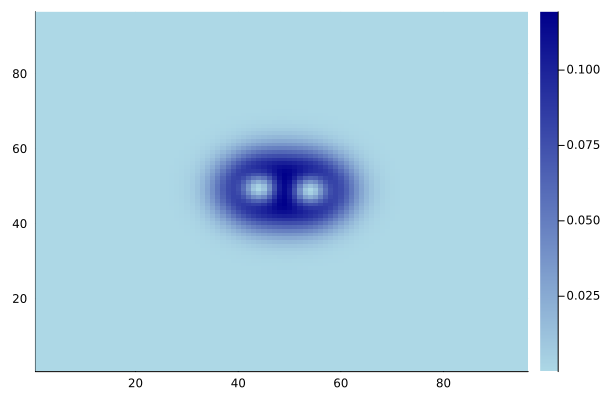

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π) = ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)